# Group Members:Brando,Danny, Aleema, Logan
We've identified loan defaults as a significant issue leading to financial losses for banks, financial institutions, and governments, based on data insights from a Coursera data science coding challenge. Our solution aims to address this challenge by implementing predictive models and risk mitigation strategies in the loan approval process, utilizing the insights gained from this valuable data. The existing debt collection industry, is only successful in recovering a 20-30% of the owed debt. This issued has created billions of dollars worth of defaulted loans at stake for these institutions. The social implications for debtors are also noteworthy, as defaulted loans can negatively impact individuals' credit scores and financial well-being.

The proposed solution involves leveraging predictive analytics and machine learning techniques we've learned in class to develop a model capable of identifying individuals likely to default on loans. By implementing such a model, lending institutions can make more informed decisions about loan approvals, thereby reducing the overall rate of defaults. This has direct financial benefits for the institutions, as they can minimize losses associated with defaulted loans and potentially increase their overall loan portfolio performance. Additionally, the solution has broader social implications, as it promotes responsible lending practices, helps protect individuals from potential financial distress, and contributes to the overall stability of the financial system.

In [128]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [78]:
loan=pd.read_csv('Loan_default.csv.zip')

In [79]:
loan=loan.sample(frac=0.05, random_state=42)

In [80]:
loan.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
51139,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,PhD,Self-employed,Single,Yes,Yes,Home,No,0
71005,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,High School,Part-time,Divorced,Yes,Yes,Education,Yes,0
35684,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,Master's,Part-time,Married,Yes,Yes,Education,Yes,0
174087,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,High School,Part-time,Single,No,No,Business,Yes,0
137952,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,PhD,Unemployed,Single,No,Yes,Business,Yes,0


In [81]:
loan.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

<Axes: >

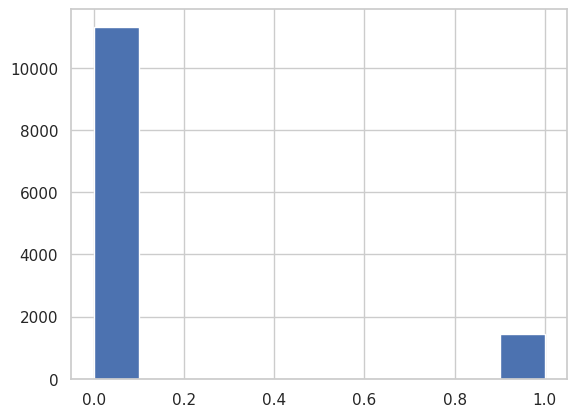

In [82]:
loan['Default'].hist()

In [83]:
loan.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [84]:
loan=loan.drop('LoanID', axis=1)

In [85]:
loan=pd.get_dummies(loan)

In [86]:
X=loan.drop('Default', axis=1)
y=loan['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [87]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

In [88]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [89]:
y_pred_log = logmodel.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test,y_pred_log)

array([[3378,    9],
       [ 429,   15]])

In [91]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3387
           1       0.62      0.03      0.06       444

    accuracy                           0.89      3831
   macro avg       0.76      0.52      0.50      3831
weighted avg       0.86      0.89      0.84      3831



In [92]:
from sklearn.metrics import roc_auc_score
print("ROC AUC:", roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1]))

ROC AUC: 0.7621436760055006


KNN

In [93]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)

In [94]:
print(classification_report(y_test, Y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test,knn.predict_proba(X_test)[:, 1] ))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3387
           1       0.19      0.03      0.05       444

    accuracy                           0.87      3831
   macro avg       0.54      0.51      0.49      3831
weighted avg       0.80      0.87      0.83      3831

ROC AUC: 0.5496931829969917


XGBoost Classification model

In [95]:
xg_class = xgb.XGBClassifier(objective='binary:logistic', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)

In [96]:
xg_class.fit(X_train,y_train)

y_pred_xg = xg_class.predict(X_test)

In [97]:
conf_matrix = confusion_matrix(y_test, y_pred_xg)
print(conf_matrix)

[[3387    0]
 [ 444    0]]


In [98]:
print(classification_report(y_test, y_pred_xg))
print("ROC AUC:", roc_auc_score(y_test, xg_class.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3387
           1       0.00      0.00      0.00       444

    accuracy                           0.88      3831
   macro avg       0.44      0.50      0.47      3831
weighted avg       0.78      0.88      0.83      3831

ROC AUC: 0.726744015937993


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest

In [99]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)

In [100]:
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [101]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)

[[3386    1]
 [ 435    9]]


In [102]:
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3387
           1       0.90      0.02      0.04       444

    accuracy                           0.89      3831
   macro avg       0.89      0.51      0.49      3831
weighted avg       0.89      0.89      0.84      3831

ROC AUC: 0.7251005434132093


MLP

In [103]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(20), max_iter=1000, random_state=1)

In [104]:
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)

In [105]:
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
print(conf_matrix)

[[3361   26]
 [ 405   39]]


In [106]:
print(classification_report(y_test, y_pred_mlp))
print("ROC AUC:", roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      3387
           1       0.60      0.09      0.15       444

    accuracy                           0.89      3831
   macro avg       0.75      0.54      0.55      3831
weighted avg       0.86      0.89      0.85      3831

ROC AUC: 0.720231968017619


TensorFlow

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [108]:
tf_model = Sequential()
tf_model.add(Dense(units=64,activation='relu'))
tf_model.add(Dense(units=32,activation='relu'))
tf_model.add(Dense(units=1,activation='sigmoid'))

In [109]:
tf_model.compile(loss='binary_crossentropy', optimizer='adam')

In [110]:
tf_model.fit(x=X_train,
          y=y_train,
          batch_size=128,
          epochs=100,
          validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
70/70 [==============================] - 2s 8ms/step - loss: 0.3675 - val_loss: 0.3486
Epoch 2/100
70/70 [==============================] - 0s 5ms/step - loss: 0.3330 - val_loss: 0.3301
Epoch 3/100
70/70 [==============================] - 0s 6ms/step - loss: 0.3199 - val_loss: 0.3185
Epoch 4/100
70/70 [==============================] - 0s 5ms/step - loss: 0.3124 - val_loss: 0.3150
Epoch 5/100
70/70 [==============================] - 0s 5ms/step - loss: 0.3100 - val_loss: 0.3136
Epoch 6/100
70/70 [==============================] - 0s 5ms/step - loss: 0.3084 - val_loss: 0.3140
Epoch 7/100
70/70 [==============================] - 0s 5ms/step - loss: 0.3073 - val_loss: 0.3147
Epoch 8/100
70/70 [==============================] - 0s 6ms/step - loss: 0.3057 - val_loss: 0.3154
Epoch 9/100
70/70 [==============================] - 0s 5ms/step - loss: 0.3050 - val_loss: 0.3141
Epoch 10/100
70/70 [==============================] - 0s 5ms/step - loss: 0.3034 - val_loss: 0.3145
Epoch 11/

In [111]:
y_pred_tf = tf_model.predict(X_test)

120/120 [==============================] - 0s 2ms/step


In [112]:
y_pred_bin = y_pred_tf>.5

In [113]:
print(classification_report(y_test, y_pred_bin))
print("ROC AUC:", roc_auc_score(y_test, y_pred_bin))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3387
           1       0.35      0.09      0.15       444

    accuracy                           0.87      3831
   macro avg       0.62      0.54      0.54      3831
weighted avg       0.83      0.87      0.84      3831

ROC AUC: 0.5356350593285933


Logistic Regression Optimization

In [114]:
!pip install eli5

In [115]:
logmodel = LogisticRegression(solver='liblinear')

logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [116]:
y_pred_log = logmodel.predict(X_test)

In [117]:
print(classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, logmodel.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3387
           1       0.62      0.03      0.06       444

    accuracy                           0.89      3831
   macro avg       0.76      0.52      0.50      3831
weighted avg       0.86      0.89      0.84      3831

ROC AUC: 0.7621436760055006


Feature Evaluation

In [118]:
import eli5
from eli5.sklearn import PermutationImportance

# Assuming logmodel is your trained logistic regression model
perm = PermutationImportance(logmodel).fit(X_test, y_test)

# Show feature importance including negative values
eli5.show_weights(perm, feature_names=X.columns.tolist())


Weight,Feature
0.0025 ± 0.0028,Age
0.0015 ± 0.0006,InterestRate
0.0012 ± 0.0010,EmploymentType_Full-time
0.0012 ± 0.0010,MonthsEmployed
0.0008 ± 0.0009,HasCoSigner_Yes
0.0007 ± 0.0003,HasDependents_Yes
0.0005 ± 0.0003,DTIRatio
0.0004 ± 0.0022,LoanAmount
0.0004 ± 0.0003,LoanPurpose_Business
0.0004 ± 0.0003,LoanPurpose_Auto


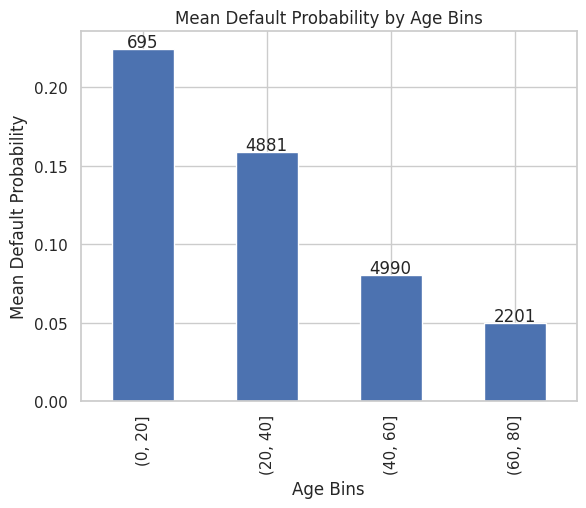

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

bins = [0, 20, 40, 60, 80]
loan['age_bin'] = pd.cut(loan['Age'], bins)

mean_default_by_age = loan.groupby('age_bin')['Default'].mean()

count_default_by_age = loan.groupby('age_bin')['Default'].count()

ax = mean_default_by_age.plot(kind='bar')

for p in ax.patches:
    age_bin = mean_default_by_age.index[ax.patches.index(p)]
    count_default = count_default_by_age[age_bin]
    ax.annotate(f"{count_default}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
ax.set_xlabel('Age Bins')
ax.set_ylabel('Mean Default Probability')
ax.set_title('Mean Default Probability by Age Bins')
plt.show()


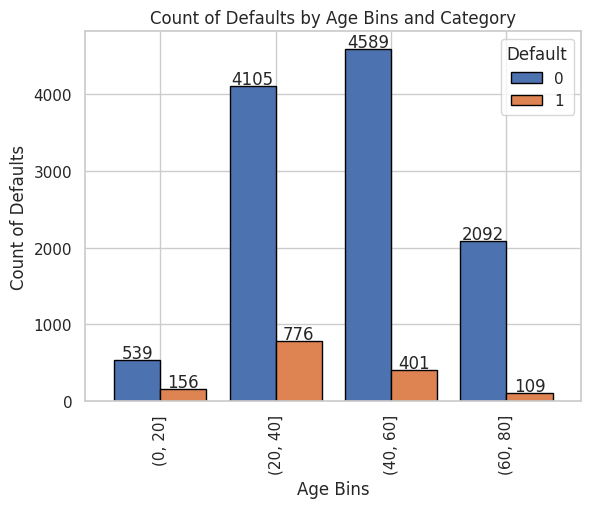

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming loan is your DataFrame with 'Age' and 'Default' columns
bins = [0, 20, 40, 60, 80]
loan['age_bin'] = pd.cut(loan['Age'], bins)

# Group by age bins and calculate the count of 'Default' for each category
count_default_by_age_category = loan.groupby(['age_bin', 'Default'])['Default'].count().unstack().fillna(0)

# Plot side-by-side (grouped) bar charts
ax = count_default_by_age_category.plot(kind='bar', edgecolor='black', width=0.8)

# Display labels on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('Age Bins')
ax.set_ylabel('Count of Defaults')
ax.set_title('Count of Defaults by Age Bins and Category')

# Show the plot
plt.show()


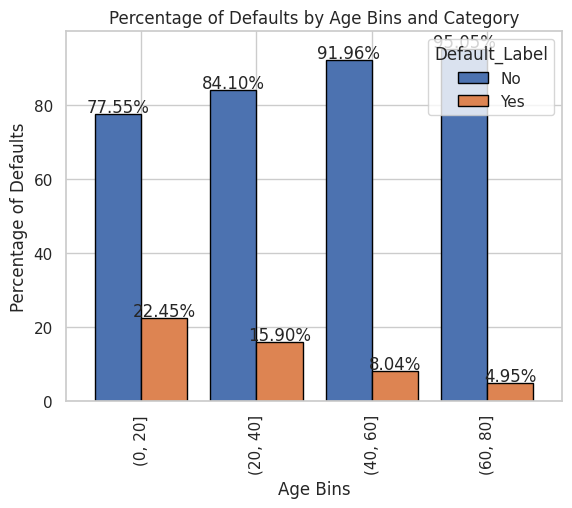

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming loan is your DataFrame with 'Age' and 'Default' columns
bins = [0, 20, 40, 60, 80]
loan['age_bin'] = pd.cut(loan['Age'], bins)

# Map 'Default' values to 'No' and 'Yes'
loan['Default_Label'] = loan['Default'].map({0: 'No', 1: 'Yes'})

# Group by age bins and calculate the count of 'Default' for each category
count_default_by_age_category = loan.groupby(['age_bin', 'Default_Label'])['Default_Label'].count().unstack().fillna(0)

# Calculate percentages within each group
percentage_default_by_age_category = count_default_by_age_category.div(count_default_by_age_category.sum(axis=1), axis=0) * 100

# Plot side-by-side (grouped) bar charts
ax = percentage_default_by_age_category.plot(kind='bar', edgecolor='black', width=0.8)

# Display labels on the bars with percentages
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}%", (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('Age Bins')
ax.set_ylabel('Percentage of Defaults')
ax.set_title('Percentage of Defaults by Age Bins and Category')

# Show the plot
plt.show()


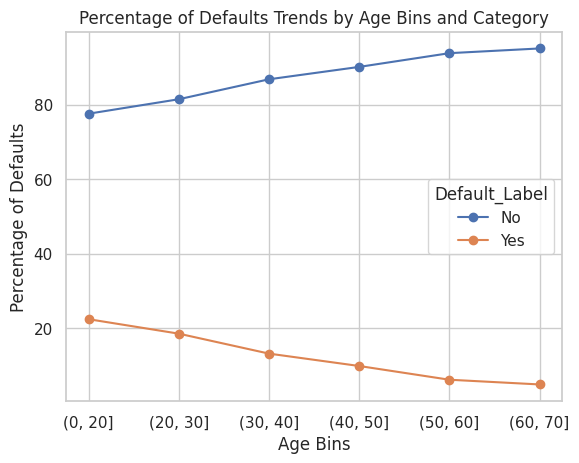

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming loan is your DataFrame with 'Age' and 'Default' columns
bins = [0, 20, 30, 40, 50, 60, 70, 80]
loan['age_bin'] = pd.cut(loan['Age'], bins)

# Map 'Default' values to 'No' and 'Yes'
loan['Default_Label'] = loan['Default'].map({0: 'No', 1: 'Yes'})

# Group by age bins and calculate the count of 'Default' for each category
count_default_by_age_category = loan.groupby(['age_bin', 'Default_Label'])['Default_Label'].count().unstack().fillna(0)

# Calculate percentages within each group
percentage_default_by_age_category = count_default_by_age_category.div(count_default_by_age_category.sum(axis=1), axis=0) * 100

# Plot a line chart
ax = percentage_default_by_age_category.plot(kind='line', marker='o', linestyle='-')

# Set labels and title
ax.set_xlabel('Age Bins')
ax.set_ylabel('Percentage of Defaults')
ax.set_title('Percentage of Defaults Trends by Age Bins and Category')

# Show the plot
plt.show()


Feature importance Income

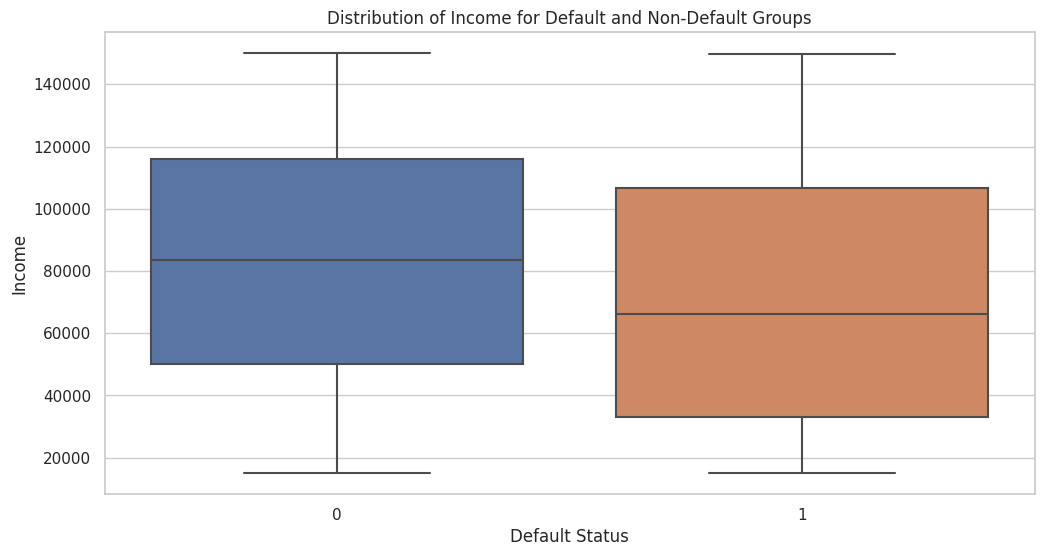

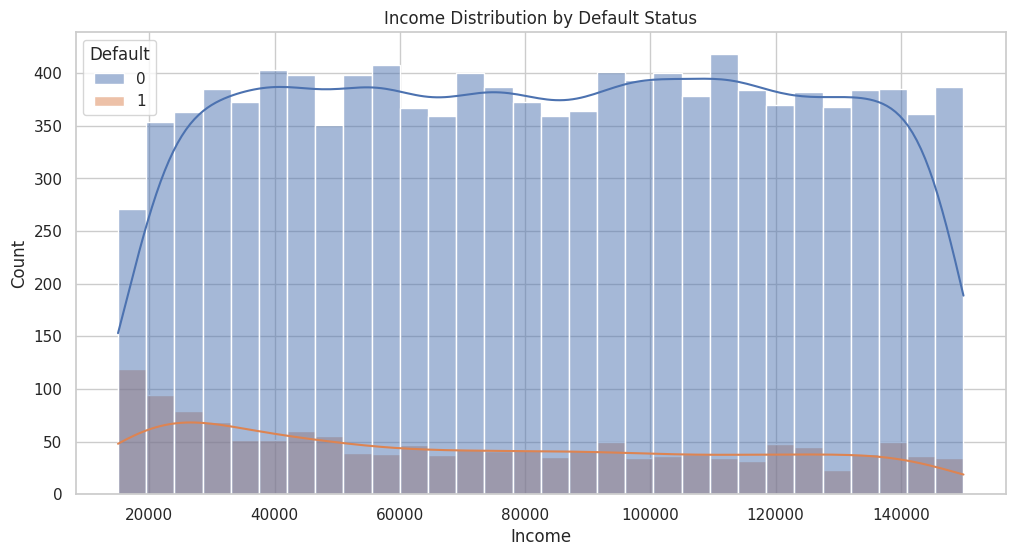

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with 'Income' and 'Default' columns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create a boxplot to visualize the distribution of income for each default category
sns.boxplot(x='Default', y='Income', data=loan)
plt.title('Distribution of Income for Default and Non-Default Groups')
plt.xlabel('Default Status')
plt.ylabel('Income')
plt.show()

# Create a histogram for the 'Income' variable
plt.figure(figsize=(12, 6))
sns.histplot(loan, x='Income', hue='Default', bins=30, kde=True)
plt.title('Income Distribution by Default Status')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


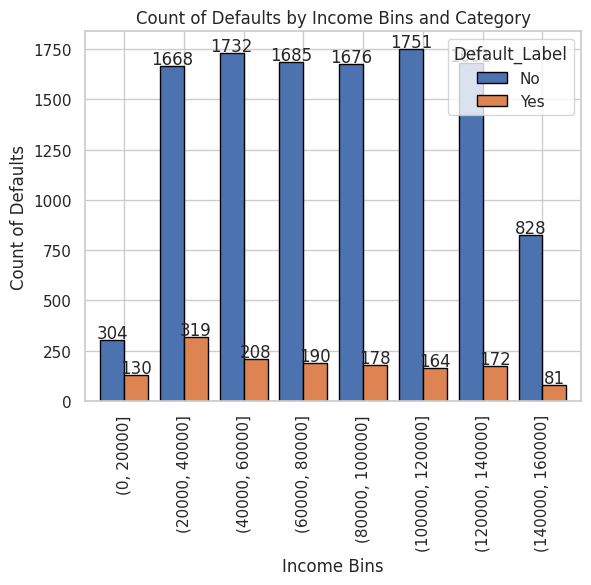

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming loan is your DataFrame with 'Income' and 'Default' columns
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000]
loan['income_bin'] = pd.cut(loan['Income'], bins)

# Map 'Default' values to 'No' and 'Yes'
loan['Default_Label'] = loan['Default'].map({0: 'No', 1: 'Yes'})

# Group by income bins and calculate the count of 'Default' for each category
count_default_by_income_category = loan.groupby(['income_bin', 'Default_Label'])['Default_Label'].count().unstack().fillna(0)

# Plot side-by-side (grouped) bar charts
ax = count_default_by_income_category.plot(kind='bar', edgecolor='black', width=0.8)

# Display labels on the bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_xlabel('Income Bins')
ax.set_ylabel('Count of Defaults')
ax.set_title('Count of Defaults by Income Bins and Category')

# Show the plot
plt.show()


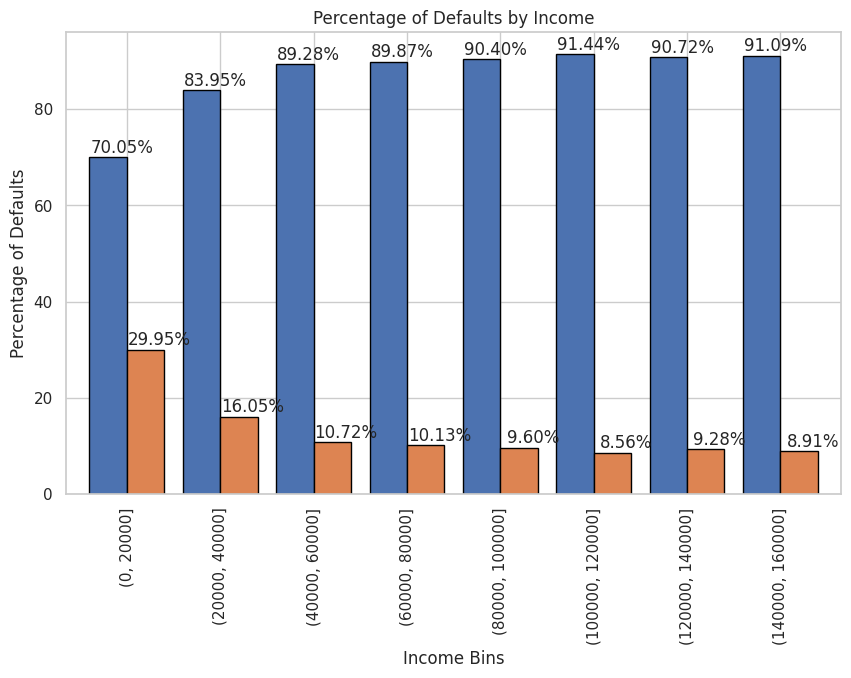

In [125]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000]
loan['income_bin'] = pd.cut(loan['Income'], bins)

loan['Default_Label'] = loan['Default'].map({0: 'No', 1: 'Yes'})

grouped_data = loan.groupby(['income_bin', 'Default_Label'])['Default_Label'].count().unstack().fillna(0)
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data_percentage = grouped_data.div(grouped_data['Total'], axis=0) * 100

fig, ax = plt.subplots(figsize=(10, 6))

grouped_data_percentage.drop(columns='Total').plot(kind='bar', ax=ax, edgecolor='black', width=0.8)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}%", (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(10, 7), textcoords='offset points')

ax.set_xlabel('Income Bins')
ax.set_ylabel('Percentage of Defaults')
ax.set_title('Percentage of Defaults by Income')
ax.legend().set_visible(False)

plt.show()


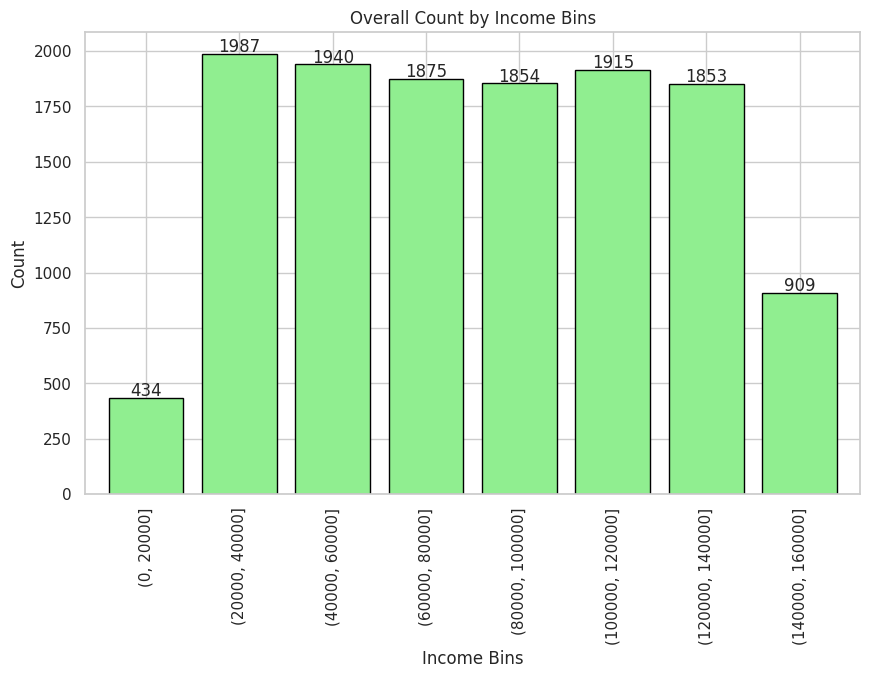

In [126]:
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000]
loan['income_bin'] = pd.cut(loan['Income'], bins)

count_by_income_category = loan.groupby('income_bin')['Income'].count()

fig, ax = plt.subplots(figsize=(10, 6))
count_by_income_category.plot(kind='bar', ax=ax, edgecolor='black', width=0.8, color='lightgreen')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

ax.set_xlabel('Income Bins')
ax.set_ylabel('Count')
ax.set_title('Overall Count by Income Bins')

plt.show()


False Positives: Incorrectly predicting that an applicant will default on a loan when they would not have, can lead to a loss of potential revenue for the institution. It also harms customer relationships and can lead to reputational damage if seen as overly cautious or unjust.


False Negatives: Failing to predict a default can have serious financial consequences, as it results in the loss of both principal and interest. Additionally, a high number of false negatives can signal to regulatory bodies that the institution's risk management practices are inadequate.
